In [1]:
import pandas as pd
import numpy as np
import vectorbt as vbt
import matplotlib.pyplot as plt
import datetime
from finta.finta import TA
import backtrader as bt

In [14]:
end = datetime.datetime.now()
start = end - datetime.timedelta(days=7)

data = vbt.YFData.download(
    ["BTC-USD"],
    missing_index="drop",
    start=start,
    end=end,
    interval="1m"
).get("Close")

data = data.to_frame(name="close")

print("INFO")
print("----------------------------------------------------------------------------")
print(data.info())
print("----------------------------------------------------------------------------")
print("DATA")
print(data.head())
print("----------------------------------------------------------------------------")
plt.plot(data['close'])

INFO
----------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9994 entries, 2023-03-14 19:06:00+00:00 to 2023-03-21 19:02:00+00:00
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   close   9994 non-null   float64
dtypes: float64(1)
memory usage: 156.2 KB
None
----------------------------------------------------------------------------
DATA
                                  close
Datetime                               
2023-03-14 19:06:00+00:00  25169.894531
2023-03-14 19:07:00+00:00  25139.376953
2023-03-14 19:08:00+00:00  25109.259766
2023-03-14 19:09:00+00:00  25106.996094
2023-03-14 19:11:00+00:00  25103.662109
----------------------------------------------------------------------------


In [ ]:
#EMA created using pandas

In [40]:
def EMA(data, slower_ema = 500, faster_ema = 100):
    ema_slower = data['close'].ewm(com=slower_ema).mean()
    ema_faster = data['close'].ewm(com=faster_ema).mean()

    trend = np.where(ema_faster >= ema_slower, 1, 0)
    trend = np.where(ema_faster <= ema_slower, -1, trend)

    return trend


In [49]:
ema_slower = data['close'].ewm(com=50).mean()
ema_faster = data['close'].ewm(com=20).mean()

entry = ema_faster.vbt.crossed_above(ema_slower)
exit = ema_faster.vbt.crossed_below(ema_slower)



In [50]:
#entry = EMA(data) == 1
#exit = EMA(data) == -1

portfolio = vbt.Portfolio.from_signals(
    close = data['close'],
    entries = entry,
    exits = exit,
)

print(portfolio.stats())
portfolio.plot().show()

C:\Users\kmate\PycharmProjects\pythonProject2\venv\lib\site-packages\vectorbt\generic\stats_builder.py:396: UserWarning:

Metric 'sharpe_ratio' requires frequency to be set

C:\Users\kmate\PycharmProjects\pythonProject2\venv\lib\site-packages\vectorbt\generic\stats_builder.py:396: UserWarning:

Metric 'calmar_ratio' requires frequency to be set

C:\Users\kmate\PycharmProjects\pythonProject2\venv\lib\site-packages\vectorbt\generic\stats_builder.py:396: UserWarning:

Metric 'omega_ratio' requires frequency to be set

C:\Users\kmate\PycharmProjects\pythonProject2\venv\lib\site-packages\vectorbt\generic\stats_builder.py:396: UserWarning:

Metric 'sortino_ratio' requires frequency to be set



Start                         2023-03-14 19:06:00+00:00
End                           2023-03-21 19:02:00+00:00
Period                                             9994
Start Value                                       100.0
End Value                                    104.107975
Total Return [%]                               4.107975
Benchmark Return [%]                          11.916766
Max Gross Exposure [%]                            100.0
Total Fees Paid                                     0.0
Max Drawdown [%]                               4.600019
Max Drawdown Duration                            3680.0
Total Trades                                         53
Total Closed Trades                                  53
Total Open Trades                                     0
Open Trade PnL                                      0.0
Win Rate [%]                                  33.962264
Best Trade [%]                                 2.823539
Worst Trade [%]                               -1

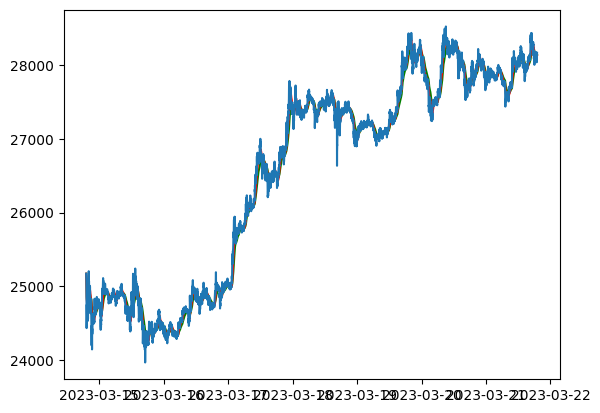

In [51]:
ema_slower = data['close'].ewm(com=50).mean()
ema_faster = data['close'].ewm(com=20).mean()
plt.plot(ema_slower, c='g')
plt.plot(ema_faster, c='r')
plt.plot(data['close'])